In [4]:
import os
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
from shutil import copyfile

# Define augmentations
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=20, p=0.5),
    A.GaussianBlur(p=0.1),
    A.Resize(640, 640),
])

# Define underrepresented classes (as per your dataset analysis)
underrepresented_classes = ["scratching-vand", "not-snatching"]  # Replace with actual class names

def contains_underrepresented_classes(label_path):
    """
    Check if the label file contains underrepresented classes.
    """
    with open(label_path, "r") as label_file:
        lines = label_file.readlines()
        for line in lines:
            class_id = int(line.split()[0])
            if class_id in underrepresented_class_ids:
                return True
    return False

def augment_image(image_path, save_path):
    """
    Apply augmentations to an image and save it.
    """
    image = cv2.imread(image_path)
    augmented = transform(image=image)
    augmented_image = augmented['image']
    cv2.imwrite(save_path, augmented_image)

def augment_yolo_dataset(dataset_path, augmented_path, underrepresented_class_ids):
    """
    Augment the YOLO dataset with a focus on underrepresented classes.
    """
    # Define paths for images and labels
    images_path = os.path.join(dataset_path, "train", "images")
    labels_path = os.path.join(dataset_path, "train", "labels")
    
    augmented_images_path = os.path.join(augmented_path, "train", "images")
    augmented_labels_path = os.path.join(augmented_path, "train", "labels")
    
    # Create directories for augmented data
    os.makedirs(augmented_images_path, exist_ok=True)
    os.makedirs(augmented_labels_path, exist_ok=True)

    for image_name in os.listdir(images_path):
        if image_name.endswith(".jpg") or image_name.endswith(".png"):
            image_path = os.path.join(images_path, image_name)
            label_path = os.path.join(labels_path, image_name.replace(".jpg", ".txt").replace(".png", ".txt"))
            
            # Save original image and label to augmented folder
            copyfile(image_path, os.path.join(augmented_images_path, image_name))
            copyfile(label_path, os.path.join(augmented_labels_path, os.path.basename(label_path)))

            # Determine augmentation priority
            if contains_underrepresented_classes(label_path):
                num_augmentations = 5  # More augmentations for underrepresented classes
            else:
                num_augmentations = 2  # Fewer augmentations for others

            # Create augmented versions
            for i in range(num_augmentations):
                augmented_image_name = f"{os.path.splitext(image_name)[0]}_aug{i}.jpg"
                augmented_image_path = os.path.join(augmented_images_path, augmented_image_name)
                
                augment_image(image_path, augmented_image_path)
                
                # Copy corresponding label (unchanged)
                augmented_label_name = augmented_image_name.replace(".jpg", ".txt")
                augmented_label_path = os.path.join(augmented_labels_path, augmented_label_name)
                copyfile(label_path, augmented_label_path)

# Define class IDs for underrepresented classes (from your data.yaml file)
underrepresented_class_ids = [8, 9]  # Replace with actual IDs for "scratching-vand", "not-snatching"

# Paths
dataset_path = "C:\\Users\\dhruv\\Desktop\\major\\Final\\RDataset\\almost-all"
augmented_path = "C:\\Users\\dhruv\\Desktop\\major\\Final\\RDataset\\augmented-dataset"

# Run augmentation
augment_yolo_dataset(dataset_path, augmented_path, underrepresented_class_ids)

print("Augmentation complete!")


ModuleNotFoundError: No module named 'cv2'

In [1]:
if __name__ == '__main__':
    import torch
    from ultralytics import YOLO
    # Your training code here
    model = YOLO('yolo11n.pt')
    # model = YOLO('yolo11n-obb.pt')
    # model = YOLO('yolo11n-pose.pt') #custom model
    
    train_results=model.train(
        data = "C:\\Users\\dhruv\\Desktop\\major\\Final\\RDataset\\opti\\data.yaml", #path of dataset
        epochs=60, #no of epoches
        imgsz=620, #img size
        #optimizer= adam, #optimizer
        weight_decay= 0.0005, # L2 reqularization
        plots=True, 
        batch =24,
        # optimizer='Adam',  # Options: 'SGD', 'Adam', 'AdamW'
        # lr0=0.01,  # Initial learning rate, experiment with 0.01, 0.001
        # lrf=0.1  
        optimizer='AdamW',  # Options: 'SGD', 'Adam', 'AdamW'
        lr0=0.001,  # Initial learning rate
        lrf=0.2  # Cosine final learning rate

    )
    

New https://pypi.org/project/ultralytics/8.3.37 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.14  Python-3.12.6 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:\Users\dhruv\Desktop\major\Final\RDataset\opti\data.yaml, epochs=60, time=None, patience=100, batch=24, imgsz=620, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=N

train: Scanning C:\Users\dhruv\Desktop\major\Final\RDataset\opti\train\labels.cache... 4264 images, 0 backgrounds, 0 co

WARNING  Box and segment counts should be equal, but got len(segments) = 178, len(boxes) = 4264. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\dhruv\Desktop\major\Final\RDataset\opti\valid\labels.cache... 1675 images, 0 backgrounds, 0 corr

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 1675. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train22\labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005625000000000001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train22
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      3.47G     0.2728      2.067      1.032         49        640: 100%|██████████| 178/178 [01:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19

                   all       1675       1675      0.383       0.37      0.251      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      3.49G     0.1795      1.305      0.957         44        640: 100%|██████████| 178/178 [01:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.185      0.435      0.252      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60       3.5G     0.1926      1.187     0.9615         48        640: 100%|██████████| 178/178 [01:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17

                   all       1675       1675      0.364      0.417      0.361      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      3.49G     0.1635      1.057     0.9386         47        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.372      0.495      0.425      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      3.48G     0.1481     0.9727       0.94         46        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.204      0.447      0.285      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      3.49G     0.1432     0.9351     0.9384         40        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.275       0.51      0.376      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      3.49G       0.13     0.8766     0.9296         49        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.439      0.636      0.556       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      3.48G     0.1239     0.8363     0.9253         45        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.578      0.532      0.576       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      3.49G      0.123     0.8078     0.9255         49        640: 100%|██████████| 178/178 [01:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.525      0.617      0.638      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      3.49G     0.1196     0.7627     0.9229         41        640: 100%|██████████| 178/178 [00:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.503      0.538      0.552      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      3.48G      0.115      0.763     0.9231         52        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.471      0.632      0.594      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      3.49G     0.1142     0.7324      0.918         54        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.589      0.642      0.679      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      3.49G     0.1143     0.7059     0.9239         39        640: 100%|██████████| 178/178 [00:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17

                   all       1675       1675      0.657      0.411       0.47      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      3.48G     0.1055     0.6849     0.9173         54        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17

                   all       1675       1675      0.592      0.581      0.647      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      3.49G     0.1079     0.6812     0.9177         46        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.551      0.711      0.691      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      3.49G     0.1043     0.6551     0.9178         42        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17

                   all       1675       1675      0.701      0.618      0.693       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      3.48G     0.1014     0.6327     0.9121         55        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17

                   all       1675       1675      0.749      0.567      0.699       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      3.49G    0.09756      0.616     0.9121         52        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.508      0.625      0.594      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      3.49G    0.09759     0.6075     0.9145         47        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.602      0.691       0.72      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      3.48G    0.09554     0.6044     0.9073         52        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.548      0.587      0.604      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      3.49G    0.09437     0.5782     0.9115         43        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.742       0.63      0.732      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      3.49G    0.09003     0.5643     0.9073         53        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.633      0.669        0.7      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      3.48G    0.09194     0.5528     0.9107         50        640: 100%|██████████| 178/178 [00:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.808      0.656      0.801      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      3.49G    0.08883     0.5325     0.9078         51        640: 100%|██████████| 178/178 [01:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.724      0.647      0.724      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      3.49G    0.08718     0.5331     0.9077         49        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.751      0.657       0.77      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      3.48G     0.0877     0.5364     0.9067         43        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17

                   all       1675       1675      0.712      0.736      0.776      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      3.49G    0.08708     0.5142     0.9098         41        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.724      0.741      0.804      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      3.49G    0.08307     0.5154     0.9069         46        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.765      0.755      0.828      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      3.48G    0.08247      0.501     0.9055         45        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.681      0.719      0.761      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      3.49G    0.08249     0.4784     0.9048         48        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.731       0.69      0.772      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      3.49G    0.08175     0.4799     0.9047         52        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.726      0.721      0.785      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      3.48G    0.07988     0.4695     0.9079         44        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.765       0.74       0.81      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      3.49G    0.07735     0.4607     0.9031         50        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675      0.749      0.766      0.816      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      3.49G     0.0749     0.4558     0.9036         53        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18

                   all       1675       1675       0.74      0.719      0.811      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      3.48G    0.07732     0.4476     0.9039         55        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17

                   all       1675       1675      0.809      0.706      0.814        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      3.49G     0.0731     0.4381     0.9052         46        640: 100%|██████████| 178/178 [01:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17

                   all       1675       1675      0.747      0.723      0.773      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      3.49G    0.07491      0.443     0.9044         53        640: 100%|██████████| 178/178 [00:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.797      0.745      0.852      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      3.48G    0.07729     0.4403     0.9085         37        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.868      0.663      0.785       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      3.49G    0.07414     0.4265     0.9022         48        640: 100%|██████████| 178/178 [00:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17

                   all       1675       1675      0.769        0.8      0.849      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      3.49G    0.07027     0.4142     0.9003         52        640: 100%|██████████| 178/178 [00:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675       0.79       0.64      0.789      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      3.48G    0.06834     0.4061     0.9025         56        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.858      0.775      0.873      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      3.49G    0.06712     0.3896     0.9011         52        640: 100%|██████████| 178/178 [00:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17

                   all       1675       1675      0.789      0.747      0.822      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      3.49G    0.06738     0.3956     0.8986         42        640: 100%|██████████| 178/178 [00:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.833      0.845      0.886      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      3.48G    0.06974     0.3894     0.9039         47        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.853      0.811      0.878      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      3.49G    0.06595     0.3736     0.8984         56        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.788      0.794      0.867       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      3.49G    0.06759     0.3775     0.9013         52        640: 100%|██████████| 178/178 [00:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.877      0.808      0.887      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      3.48G    0.06456     0.3637     0.9005         49        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.847      0.832      0.899      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      3.49G    0.06561     0.3812     0.8987         51        640: 100%|██████████| 178/178 [00:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.785      0.789       0.83      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      3.49G    0.06376     0.3634     0.8966         50        640: 100%|██████████| 178/178 [00:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.836      0.805      0.877       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      3.48G    0.06571     0.3463     0.9018         45        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17

                   all       1675       1675      0.857      0.799      0.874      0.845


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      3.48G    0.06548     0.3176     0.9291         16        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17

                   all       1675       1675      0.842      0.823      0.877      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      3.48G      0.046     0.2501     0.9124         16        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.831       0.79      0.879      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      3.47G    0.04231     0.2257     0.9123         16        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.829      0.862      0.891      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      3.48G    0.04002     0.1992     0.9114         16        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17

                   all       1675       1675      0.884      0.815      0.886      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      3.48G    0.03891     0.2035     0.9105         16        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.859       0.78      0.853      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      3.47G    0.04032     0.1903     0.9126         16        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.805       0.84      0.885      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      3.48G    0.03843      0.184     0.9063         16        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.899       0.84      0.914      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      3.48G    0.03858     0.1742     0.9082         16        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.899      0.813      0.907      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      3.47G    0.03945     0.1593     0.9111         16        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.875      0.821       0.91      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      3.48G    0.03644     0.1525     0.9085         16        640: 100%|██████████| 178/178 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16

                   all       1675       1675      0.913      0.813       0.91      0.901



60 epochs completed in 1.319 hours.
Optimizer stripped from runs\detect\train22\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train22\weights\best.pt, 5.5MB

Validating runs\detect\train22\weights\best.pt...
Ultralytics 8.3.14  Python-3.12.6 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,584,882 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18


                   all       1675       1675      0.898      0.841      0.914      0.907
       Chain-Snatching         14         14      0.645      0.643        0.7      0.656
             Explosion        102        102      0.967      0.951      0.988      0.986
                  Fire         90         90          1      0.958      0.995      0.994
                   Gun        125        125      0.865      0.819      0.921      0.917
         OBJ-Snatching        524        524      0.949      0.955      0.985      0.984
          car-accident         35         35      0.964      0.765       0.94      0.936
              des-cars         17         17      0.807      0.824      0.869      0.869
       destroying-vand         64         64      0.737      0.859      0.872      0.866
                 knife        220        220       0.97      0.905      0.974      0.969
     threat-actor-mele        301        301      0.972      0.938      0.987      0.987
     threat-actor-van

In [2]:
# Validate the model
model = YOLO("C:\\Users\\dhruv\\Desktop\\major\\Final\\code\\runs\\detect\\train22\\weights\\best.pt")
metrics = model.val(
    conf=0.25, 
    iou=0.6,
    save_json=True
) 
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.14  Python-3.12.6 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,584,882 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\dhruv\Desktop\major\Final\RDataset\opti\valid\labels.cache... 1675 images, 0 backgrounds, 0 corr

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 1675. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:


                   all       1675       1675      0.773      0.858      0.875      0.873
       Chain-Snatching         14         14      0.747      0.422        0.6      0.593
             Explosion        102        102      0.881      0.971      0.984      0.984
                  Fire         90         90      0.989      0.989      0.993      0.993
                   Gun        125        125      0.621       0.84      0.778      0.772
         OBJ-Snatching        524        524      0.979      0.881      0.948      0.946
          car-accident         35         35      0.864      0.906      0.946      0.946
              des-cars         17         17      0.574      0.882      0.864      0.864
       destroying-vand         64         64      0.554      0.875      0.801      0.801
                 knife        220        220      0.805      0.932      0.946      0.946
     threat-actor-mele        301        301      0.969       0.94      0.968      0.967
     threat-actor-van

array([    0.59303,     0.98386,     0.99259,     0.77188,     0.87287,     0.87287,     0.94594,     0.94631,     0.86369,     0.80118,     0.94615,     0.96683,     0.92848,     0.73451])

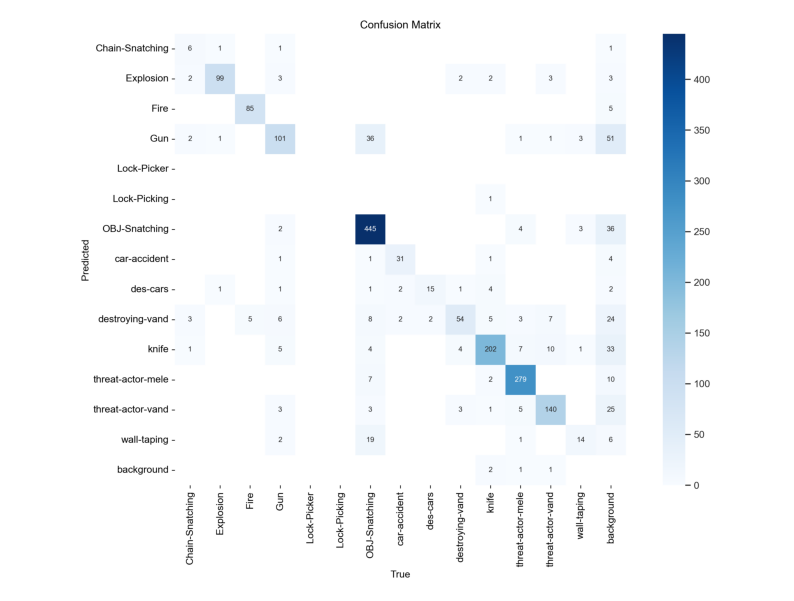

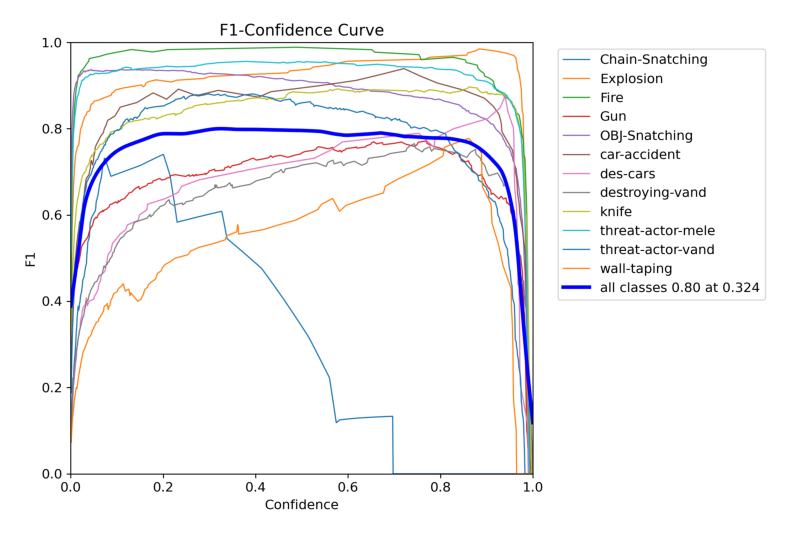

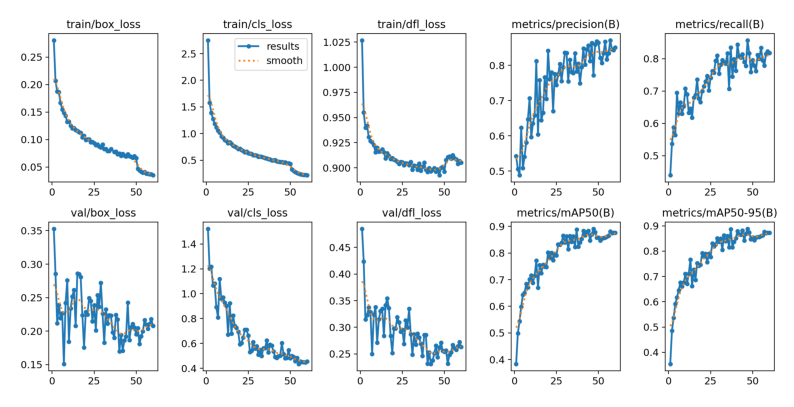

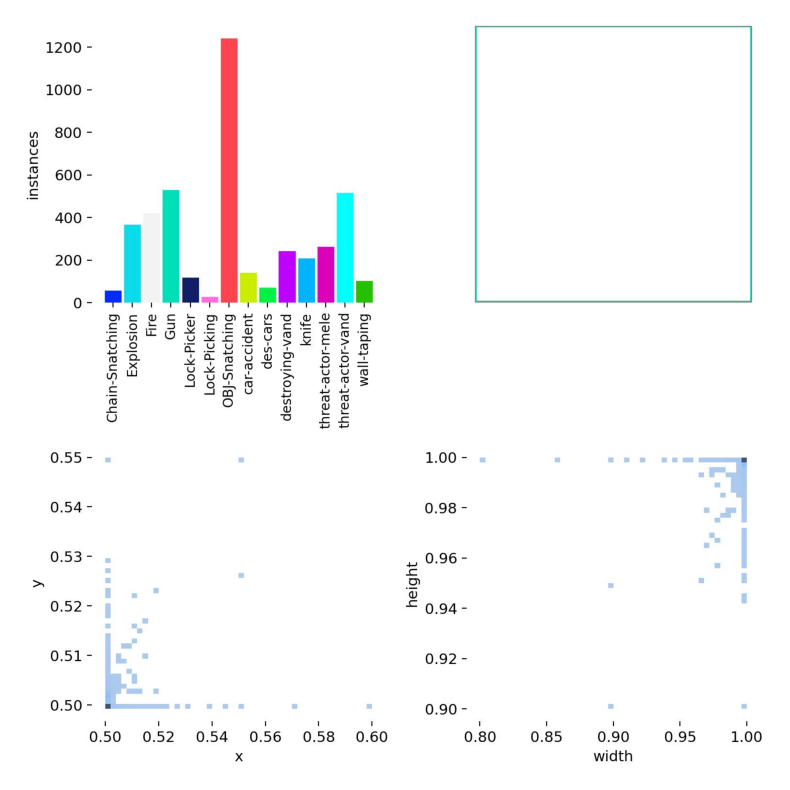

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from PIL import Image
plot_dir = 'C:\\Users\\dhruv\\Desktop\\major\\Final\\code\\runs\\detect\\train20'  # Adjust if the experiment folder has a different name

# Show training and validation loss graph
loss_plot_path = os.path.join(plot_dir, 'confusion_matrix.png',)  # The plot for loss, precision, recall, mAP
if os.path.exists(loss_plot_path):
    img = Image.open(loss_plot_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')  # No axis
    plt.show()
else:
    print(f"Plot not found at {loss_plot_path}")
loss_plot_path = os.path.join(plot_dir, 'F1_curve.png',)  # The plot for loss, precision, recall, mAP
if os.path.exists(loss_plot_path):
    img = Image.open(loss_plot_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')  # No axis
    plt.show()
else:
    print(f"Plot not found at {loss_plot_path}")
loss_plot_path = os.path.join(plot_dir, 'results.png',)  # The plot for loss, precision, recall, mAP
if os.path.exists(loss_plot_path):
    img = Image.open(loss_plot_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')  # No axis
    plt.show()
else:
    print(f"Plot not found at {loss_plot_path}")

loss_plot_path = os.path.join(plot_dir, 'labels.jpg',)  # The plot for loss, precision, recall, mAP
if os.path.exists(loss_plot_path):
    img = Image.open(loss_plot_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')  # No axis
    plt.show()
else:
    print(f"Plot not found at {loss_plot_path}")

In [4]:
from ultralytics import YOLO

# Load an official or custom model
model = YOLO('yolo11n.pt')  # Load an official Detect model
model = YOLO("yolo11n-seg.pt")  # Load an official Segment model
# model = YOLO("yolo11n-pose.pt")  # Load an official Pose model
model = YOLO("C:\\Users\\dhruv\\Desktop\\major\\Final\\code\\runs\\detect\\train22\\weights\\best.pt")  # Load a custom trained model

# Perform tracking with the model
# results = model.track("https://youtu.be/Gr0HpDM8Ki8?feature=shared", save=True)  # Tracking with default tracker
# results = model.track("https://youtu.be/MNn9qKG2UFI?feature=shared", save=True, tracker="bytetrack.yaml")
# results = model.predict("C:\\Users\\dhruv\\Desktop\\major\\playground\\car_accident\\test\\images\\2accidentFra/me760_jpg.rf.6af98c86a800a299f826b3a0b471796e.jpg", save=True, tracker="bytetrack.yaml")  # with ByteTrack
results = model.predict(source="C:\\Users\\dhruv\\Desktop\\major\\Final\\RDataset\\almost-all\\valid\\images\\00000031_jpg.rf.1dbb1de30f07c19ecf341fd2bb8b1403.jpg", save=True, tracker="bytetrack.yaml")


image 1/1 C:\Users\dhruv\Desktop\major\Final\RDataset\almost-all\valid\images\00000031_jpg.rf.1dbb1de30f07c19ecf341fd2bb8b1403.jpg: 640x640 1 wall-taping, 81.3ms
Speed: 10.4ms preprocess, 81.3ms inference, 12.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict19


In [1]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU
benchmark(model="C:\\Users\\dhruv\\Desktop\\major\\Final\\code\\runs\\detect\\train22\\weights\\best.pt", data="C:\\Users\\dhruv\\Desktop\\major\\Final\\RDataset\\opti\\data.yaml", imgsz=640, half=False, device=0)


image 1/1 C:\Users\dhruv\Desktop\major\myenv\Lib\site-packages\ultralytics\assets\bus.jpg: 640x480 1 OBJ-Snatching, 1 destroying-vand, 163.2ms
Speed: 6.6ms preprocess, 163.2ms inference, 233.9ms postprocess per image at shape (1, 3, 640, 480)


val: Scanning C:\Users\dhruv\Desktop\major\Final\RDataset\opti\valid\labels.cache... 1675 images, 0 backgrounds, 0 corr

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 1675. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1675/1675 [0


                   all       1675       1675      0.559       0.54       0.58     0.0922
Speed: 1.0ms preprocess, 28.8ms inference, 0.0ms loss, 2.9ms postprocess per image

PyTorch: starting from 'C:\Users\dhruv\Desktop\major\Final\code\runs\detect\train20\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 18, 8400) (5.2 MB)

TorchScript: starting export with torch 2.5.0+cu124...
TorchScript: export success  4.4s, saved as 'C:\Users\dhruv\Desktop\major\Final\code\runs\detect\train20\weights\best.torchscript' (10.4 MB)

Export complete (4.7s)
Results saved to C:\Users\dhruv\Desktop\major\Final\code\runs\detect\train20\weights
Predict:         yolo predict task=detect model=C:\Users\dhruv\Desktop\major\Final\code\runs\detect\train20\weights\best.torchscript imgsz=640  
Validate:        yolo val task=detect model=C:\Users\dhruv\Desktop\major\Final\code\runs\detect\train20\weights\best.torchscript imgsz=640 data=C:\Users\dhruv\Desktop\major\Final\RDataset\opti\

val: Scanning C:\Users\dhruv\Desktop\major\Final\RDataset\opti\valid\labels.cache... 1675 images, 0 backgrounds, 0 corr

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 1675. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1675/1675 [0

                   all       1675       1675      0.654      0.589       0.64      0.153
Speed: 0.8ms preprocess, 18.0ms inference, 0.0ms loss, 2.8ms postprocess per image



PyTorch: starting from 'C:\Users\dhruv\Desktop\major\Final\code\runs\detect\train20\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 18, 8400) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success  3.4s, saved as 'C:\Users\dhruv\Desktop\major\Final\code\runs\detect\train20\weights\best.onnx' (10.1 MB)

Export complete (3.5s)
Results saved to C:\Users\dhruv\Desktop\major\Final\code\runs\detect\train20\weights
Predict:         yolo predict task=detect model=C:\Users\dhruv\Desktop\major\Final\code\runs\detect\train20\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=C:\Users\dhruv\Desktop\major\Final\code\runs\detect\train20\weights\best.onnx imgsz=640 data=C:\Users\dhruv\Desktop\major\Final\RDataset\opti\data.yaml  
Visualize:       https://netron.app
Loading C:\Users\dhruv\Desktop\major\Final\code\runs\detect\train20\weights\best.onnx for ONNX Runtime inference...



val: Scanning C:\Users\dhruv\Desktop\major\Final\RDataset\opti\valid\labels.cache... 1675 images, 0 backgrounds, 0 corr

WARNING  Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 1675. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1675/1675 [0

                   all       1675       1675      0.654       0.59       0.64      0.153


Speed: 1.1ms preprocess, 29.6ms inference, 0.0ms loss, 3.0ms postprocess per image
ERROR  Benchmark failure for OpenVINO: inference not supported on GPU

PyTorch: starting from 'C:\Users\dhruv\Desktop\major\Final\code\runs\detect\train20\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 18, 8400) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success  2.9s, saved as 'C:\Users\dhruv\Desktop\major\Final\code\runs\detect\train20\weights\best.onnx' (10.1 MB)
TensorRT: export failure  2.9s: No module named 'tensorrt'
ERROR  Benchmark failure for TensorRT: No module named 'tensorrt'
ERROR  Benchmark failure for CoreML: CoreML and TF.js export only supported on macOS and Linux

PyTorch: starting from 'C:\Users\dhruv\Desktop\major\Final\code\runs\detect\train20\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 18, 8400) (5.2 MB)


KeyboardInterrupt: 